In [16]:
from pathlib import Path
import pandas as pd

github_p = "https://github.com/Finance-781/FinML/raw/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"
my_file = Path("datasets/sydney_airbnb.csv")

if my_file.is_file():
    print("Local file found")
    df = pd.read_csv('datasets/sydney_airbnb.csv')
    
else:
    print("Patience Padawan: Loading from Github...may take about 2 mins")
    print("Once loaded, 'Done' will be displayed in the code output.")
    df = pd.read_csv(github_p+"datasets/sydney_airbnb.csv")
    print("===========")
    print("***Done!***")
    print("===========")

Patience Padawan: Loading from Github...may take about 2 mins
Once loaded, 'Done' will be displayed in the code output.
***Done!***


In [18]:
df.head(3)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,Guests have access to whole house except locke...,...,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.03


In [20]:
#Seperating out needed features for ML models
model_cols = ["price", "city", "longitude", "latitude", "review_scores_rating", "number_of_reviews", "minimum_nights", "security_deposit", "cleaning_fee", "accommodates", "bathrooms", "bedrooms", "beds", "property_type", "room_type", "availability_365", "host_identity_verified", "host_is_superhost", "host_since", "cancellation_policy"]
df = df[model_cols]
df.head(3)

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,20/11/09,strict_14_with_grace_period


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
price                     27070 non-null object
city                      27037 non-null object
longitude                 27070 non-null float64
latitude                  27070 non-null float64
review_scores_rating      19512 non-null float64
number_of_reviews         27070 non-null int64
minimum_nights            27070 non-null int64
security_deposit          16722 non-null object
cleaning_fee              19250 non-null object
accommodates              27070 non-null int64
bathrooms                 27048 non-null float64
bedrooms                  27062 non-null float64
beds                      27037 non-null float64
property_type             27070 non-null object
room_type                 27070 non-null object
availability_365          27070 non-null int64
host_identity_verified    27035 non-null object
host_is_superhost         27035 non-null object
host_since               

In [22]:
df.describe()

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,accommodates,bathrooms,bedrooms,beds,availability_365
count,27070.000000,27070.000000,19512.000000,27070.000000,27070.000000,27070.000000,27048.000000,27062.000000,27037.000000,27070.000000
mean,151.210667,-33.862368,93.412413,14.005689,4.504211,3.383598,1.352337,1.614071,2.012169,102.128999
std,0.079451,0.072260,9.354959,29.808917,14.550036,2.196864,0.664092,1.109725,1.526399,128.116451
min,150.644964,-34.135212,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,151.184472,-33.897603,90.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,151.223242,-33.883064,96.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,32.500000
75%,151.264889,-33.831850,100.000000,13.000000,5.000000,4.000000,1.500000,2.000000,2.000000,179.000000
max,151.339811,-33.389728,100.000000,468.000000,1000.000000,16.000000,10.000000,46.000000,29.000000,365.000000


In [23]:
import re
dollar_sign_list = ["price", "cleaning_fee", "security_deposit"]

# Changes any nulls or negative numbers to 0 and remove everything except digits. 
for col in dollar_sign_list:
    df[col] = df[col].fillna("0")
    df[col] = df[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)
    
# Convert host_since column into datetime datatype
df['host_since'] = pd.to_datetime(df['host_since'])

In [36]:
df.dtypes

price                            float64
city                              object
longitude                        float64
latitude                         float64
review_scores_rating             float64
number_of_reviews                  int64
minimum_nights                     int64
security_deposit                 float64
cleaning_fee                     float64
accommodates                       int64
bathrooms                        float64
bedrooms                         float64
beds                             float64
property_type                     object
room_type                         object
availability_365                   int64
host_identity_verified            object
host_is_superhost                 object
host_since                datetime64[ns]
cancellation_policy               object
dtype: object

In [37]:
df[dollar_sign_list].head(3)

,price,cleaning_fee,security_deposit
0,65.0,0.0,0.0
1,98.0,55.0,0.0
2,469.0,100.0,900.0


In [38]:
df.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365
count,27070.000000,27070.000000,27070.000000,19512.000000,27070.000000,27070.000000,27070.000000,27070.000000,27070.000000,27048.000000,27062.000000,27037.000000,27070.000000
mean,209.278796,151.210667,-33.862368,93.412413,14.005689,4.504211,305.766679,66.674178,3.383598,1.352337,1.614071,2.012169,102.128999
std,304.336271,0.079451,0.072260,9.354959,29.808917,14.550036,591.491850,88.246098,2.196864,0.664092,1.109725,1.526399,128.116451
min,0.000000,150.644964,-34.135212,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,151.184472,-33.897603,90.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,135.000000,151.223242,-33.883064,96.000000,3.000000,2.000000,0.000000,40.000000,2.000000,1.000000,1.000000,1.000000,32.500000
75%,229.000000,151.264889,-33.831850,100.000000,13.000000,5.000000,450.000000,100.000000,4.000000,1.500000,2.000000,2.000000,179.000000
max,12999.000000,151.339811,-33.389728,100.000000,468.000000,1000.000000,7000.000000,999.000000,16.000000,10.000000,46.000000,29.000000,365.000000


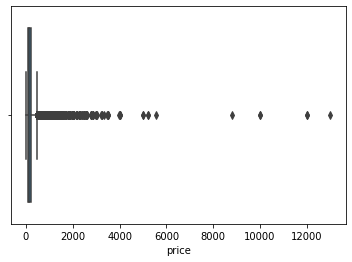

In [65]:
import seaborn as sns

ax = sns.boxplot(y=df["price"], orient="h")

Above boxplot shows majority of prices are close to the bottom (approximately around 100-200 price range) with very few prices on the high end. 

In [71]:
# Checking skewness and kurtosis
skew = df["price"].skew()
kurtosis = df["price"].kurtosis()
print(f"The skewness is {skew}. Positive number indicates the data is skewed right.")
print(f"The kurtosis is {kurtosis}. Positive number indicates heavy-tailed distribution.")

The skewness is 13.808558337216192. Positive number indicates the data is skewed right.
The kurtosis is 413.4301463784445. Positive number indicates heavy-tailed distribution.


<h2>Comparing 2 different datasets.</h2>

- One dataset will keep all data rows under the 99.5% value of 1600 - df_995
- Another dataset will keep all data rows under 95% value of 625 - df_95

In [111]:
display(df["price"].describe())
quantile_995 = df["price"].quantile(0.995)
quantile_95 = df["price"].quantile(0.95)
print(f"This function determines the highest value of data of the 99.5% percentile: {quantile_995}")
print(f"This function determines the highest value of data of the 95% percentile: {quantile_95}")

count    27070.000000
mean       209.278796
std        304.336271
min          0.000000
25%         80.000000
50%        135.000000
75%        229.000000
max      12999.000000
Name: price, dtype: float64

This function determines the highest value of data of the 99.5% percentile: 1600.0
This function determines the highest value of data of the 95% percentile: 625.0


In [114]:
df_995 = df.copy()
df_95 = df.copy()

df_995 = df[df["price"]<df["price"].quantile(0.995)].reset_index(drop=True)
df_95 = df[df["price"]<df["price"].quantile(0.95)].reset_index(drop=True)

In [117]:
# Checking skewness and kurtosis
skew = df_995["price"].skew()
kurtosis = df_995["price"].kurtosis()
print(f"The skewness for the data in 99.5% quantile is {skew}. Positive number indicates the data is skewed right.")
print(f"The kurtosis for the data in 99.5% quantile is {kurtosis}. Positive number indicates heavy-tailed distribution.")

The skewness for the data in 99.5% quantile is 2.957872457159033. Positive number indicates the data is skewed right.
The kurtosis for the data in 99.5% quantile is 11.18710844862683. Positive number indicates heavy-tailed distribution.


In [118]:
# Checking skewness and kurtosis
skew = df_95["price"].skew()
kurtosis = df_95["price"].kurtosis()
print(f"The skewness for the data in 95% quantile is {skew}. Positive number indicates the data is skewed right.")
print(f"The kurtosis for the data in 95% quantile is {kurtosis}. Positive number indicates heavy-tailed distribution.")

The skewness for the data in 95% quantile is 1.5313677571947253. Positive number indicates the data is skewed right.
The kurtosis for the data in 95% quantile is 2.1657662444392938. Positive number indicates heavy-tailed distribution.


In [120]:
display(df_995.isnull().sum())
df_95.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

price                        0
city                        31
longitude                    0
latitude                     0
review_scores_rating      6834
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   21
bedrooms                     8
beds                        32
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

In [136]:
df_995[df_995.isnull().any(axis=1)].head(3) 

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,2009-09-23,moderate
14,1045.0,Bondi Junction,151.242593,-33.891763,NaN,0,7,0.0,0.0,8,2.0,4.0,5.0,House,Entire home/apt,365,t,f,2010-09-11,strict_14_with_grace_period
24,90.0,Narrabeen,151.294956,-33.720553,NaN,0,5,0.0,0.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,333,t,f,2011-12-01,moderate


In [137]:
df_95[df_95.isnull().any(axis=1)].head(3) 

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,2009-09-23,moderate
22,90.0,Narrabeen,151.294956,-33.720553,NaN,0,5,0.0,0.0,2,1.0,1.0,1.0,Apartment,Entire home/apt,333,t,f,2011-12-01,moderate
24,35.0,Alexandria,151.202366,-33.902255,98.0,29,1,0.0,0.0,1,NaN,1.0,1.0,Apartment,Shared room,361,f,f,2011-01-20,moderate


In [138]:
df_995.fillna(df_995.mean(), inplace=True)
df_95.fillna(df_95.mean(), inplace=True)

In [143]:
display(df_995["review_scores_rating"].mean())
df_995[df_995.isnull().any(axis=1)].head(3) 

93.40493192910293

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
495,499.0,Palm Beach,151.318769,-33.598541,96.000000,58,1,0.0,0.0,2,1.0,1.0,2.0,Boat,Entire home/apt,363,NaN,NaN,NaT,strict_14_with_grace_period
1555,61.0,Darlington,151.195717,-33.889006,93.404932,0,1,0.0,0.0,1,1.0,1.0,1.0,House,Private room,0,NaN,NaN,NaT,strict_14_with_grace_period
1604,455.0,Bronte,151.255720,-33.901107,93.404932,1,5,1000.0,350.0,6,2.0,3.0,4.0,House,Entire home/apt,0,NaN,NaN,NaT,moderate


In [144]:
display(df_95["review_scores_rating"].mean())
df_95[df_95.isnull().any(axis=1)].head(3) 

93.32768211919976

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
471,499.0,Palm Beach,151.318769,-33.598541,96.000000,58,1,0.0,0.0,2,1.0,1.0,2.0,Boat,Entire home/apt,363,NaN,NaN,NaT,strict_14_with_grace_period
1467,61.0,Darlington,151.195717,-33.889006,93.327682,0,1,0.0,0.0,1,1.0,1.0,1.0,House,Private room,0,NaN,NaN,NaT,strict_14_with_grace_period
1514,455.0,Bronte,151.255720,-33.901107,93.327682,1,5,1000.0,350.0,6,2.0,3.0,4.0,House,Entire home/apt,0,NaN,NaN,NaT,moderate


<h2>Data Exploration</h2>